In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score


In [26]:
df1 = pd.read_csv("/content/drive/MyDrive/Statml project/adult.csv")
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [27]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [28]:
df1.drop(['relationship','capital.gain','capital.loss'],axis=1,inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,<=50K


In [29]:
l=df1.columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours.per.week  32561 non-null  int64 
 10  native.country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [30]:
for i in l:
    if df1[i].dtype=='object':
        df1[i] = df1[i].str.strip()

In [31]:
b=[]
for i in df1.columns:
    for j in range(df1.shape[0]):
        if df1[i][j]=='?':
            b.append(j)
df1.drop(index=b,inplace=True)
print(len(b))

4262


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours.per.week  30162 non-null  int64 
 10  native.country  30162 non-null  object
 11  income          30162 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [33]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [34]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,40,United-States,<=50K


<Axes: xlabel='education'>

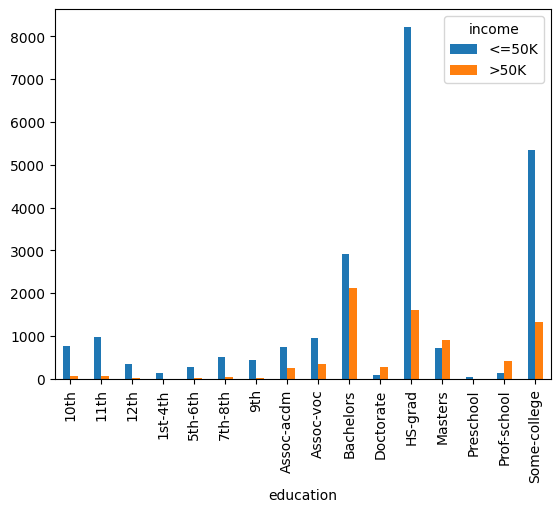

In [35]:
inc_gen = pd.crosstab(df1['education'],df1['income'])
inc_gen.plot(kind='bar')

<Axes: xlabel='income'>

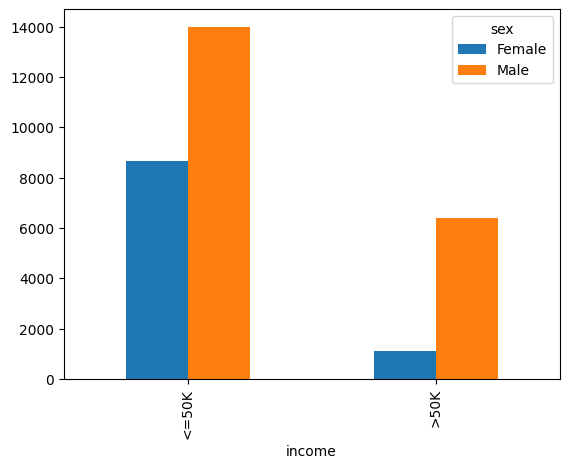

In [36]:
inc_gen = pd.crosstab(df1['income'],df1['sex'])
inc_gen.plot(kind='bar')

<Axes: xlabel='workclass'>

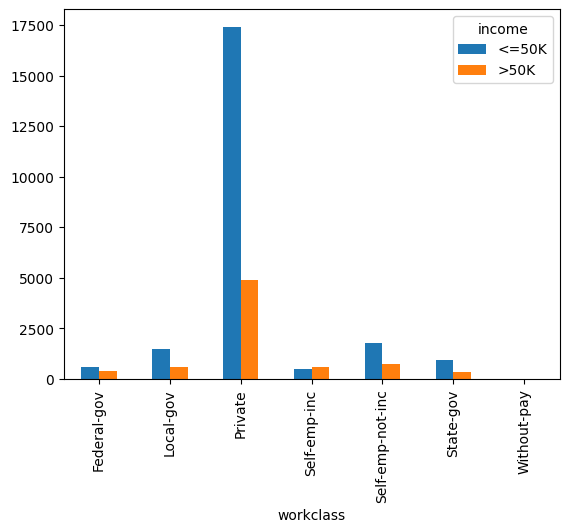

In [37]:
inc_wc = pd.crosstab(df1['workclass'],df1['income'],)
inc_wc.plot(kind='bar')

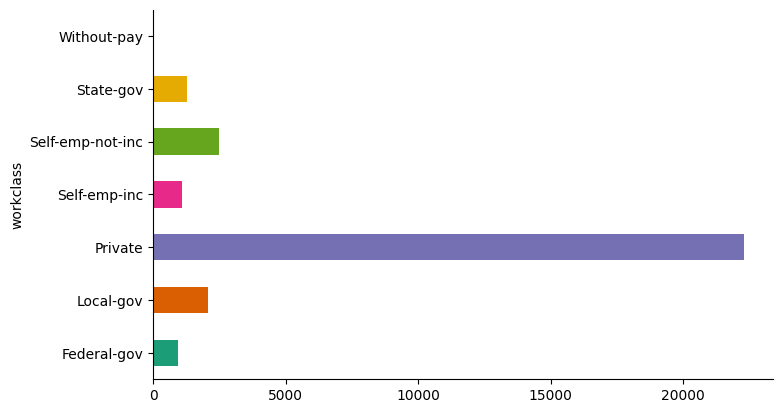

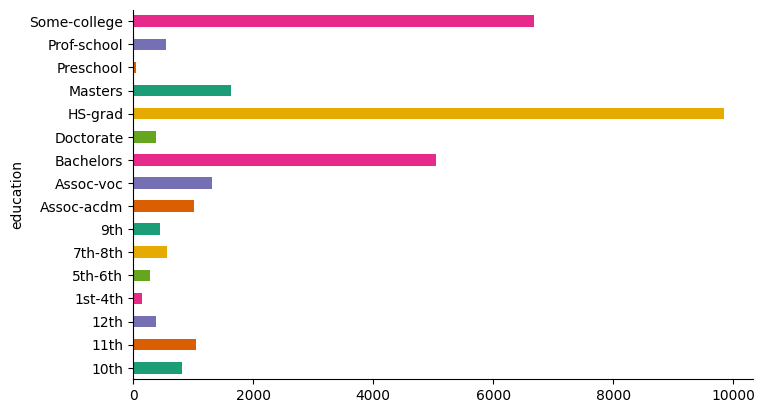

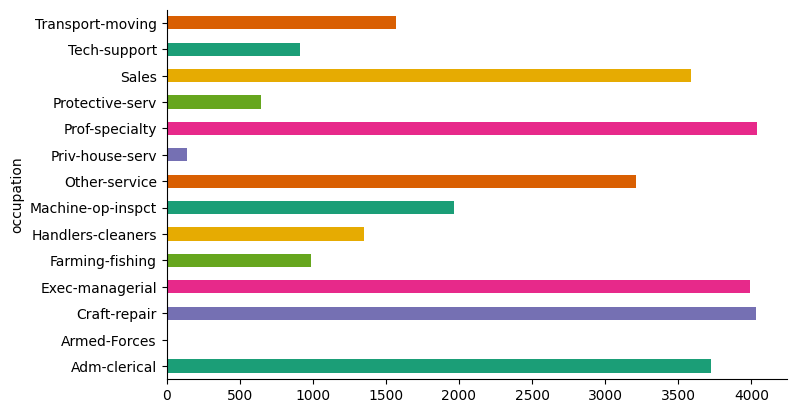

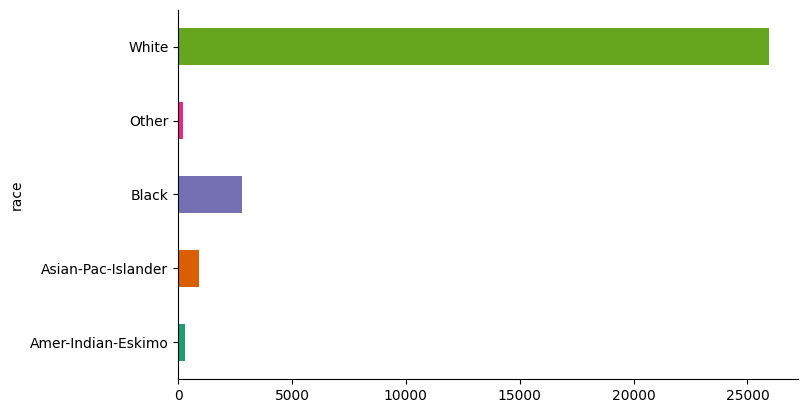

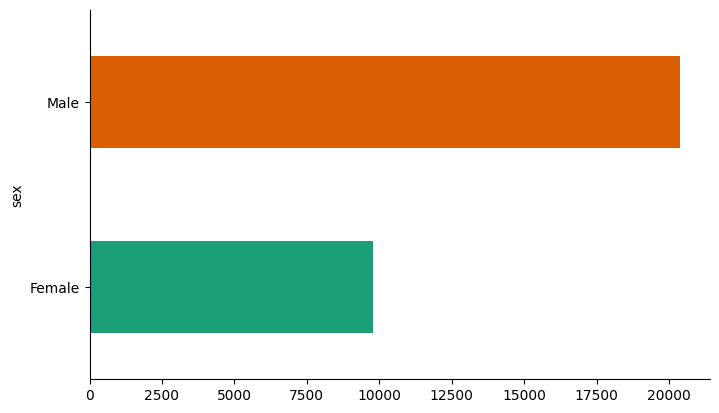

In [38]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return plt.show()
b=['workclass','education','occupation','race','sex']
for i in b:
  categorical_histogram(df1, *[i], **{})

In [39]:
df1['income']=df1['income'].apply(lambda x: 0 if x=='<=50K' else 1 )
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,White,Male,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,0


<ipython-input-40-a2a0f6282b1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap="CMRmap", annot=True)


<Axes: >

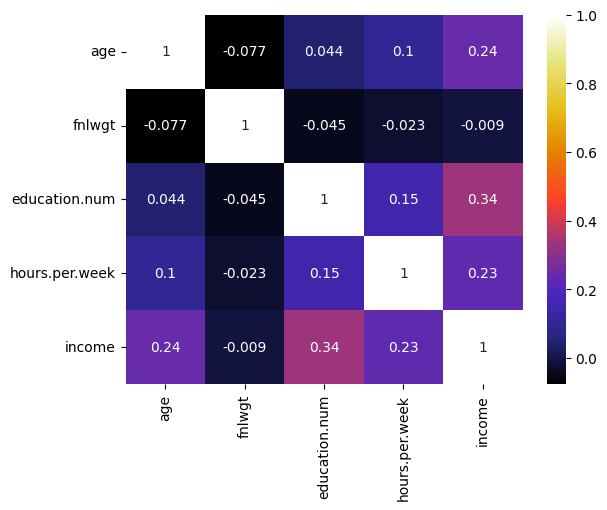

In [40]:
sns.heatmap(df1.corr(), cmap="CMRmap", annot=True)

In [41]:
df1.drop(['fnlwgt'],axis=1,inplace=True)
df1.head()

,age,workclass,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,White,Male,40,United-States,0


In [42]:
obj=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        obj.append(i)
obj

['workclass',
 'education',
 'marital.status',
 'occupation',
 'race',
 'sex',
 'native.country']

In [43]:
y=df1['income']
x=df1.drop(['income'],axis=1)

encoder = OrdinalEncoder()
for i in obj:
  x[i] = encoder.fit_transform(np.array(x[i]).reshape(-1,1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [44]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5245  404]
 [1153  739]]


0.7935287097201963

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load your dataset and preprocess it as you mentioned in your original code
df1 = pd.read_csv("/content/drive/MyDrive/Statml project/adult.csv")

# Drop rows with missing values
df1 = df1.replace('?', np.nan).dropna()

# Define your target and feature variables
y = df1['income']
X = df1.drop(['income', 'relationship', 'capital.gain', 'capital.loss', 'fnlwgt'], axis=1)

# Encode categorical features using OrdinalEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Perceptron
classifier_perceptron = Perceptron()
classifier_perceptron.fit(X_train, y_train)
y_pred_perceptron = classifier_perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)

# SVM
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Now, for k-NN with Bootstrap (as you requested)
n_bootstrap = 100  # Number of bootstrap iterations
knn_accuracies = []

for _ in range(n_bootstrap):
    x_resampled, y_resampled = resample(X_train, y_train, random_state=_)
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(x_resampled, y_resampled)
    y_pred_knn = classifier_knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, y_pred_knn))

mean_knn_accuracy = sum(knn_accuracies) / n_bootstrap
print("k-NN with Bootstrap Mean Accuracy:", mean_knn_accuracy)


Logistic Regression Accuracy: 0.7932634929054502
Perceptron Accuracy: 0.7582548733589709
SVM Accuracy: 0.8140830128630155
k-NN with Bootstrap Mean Accuracy: 0.7962538124917125


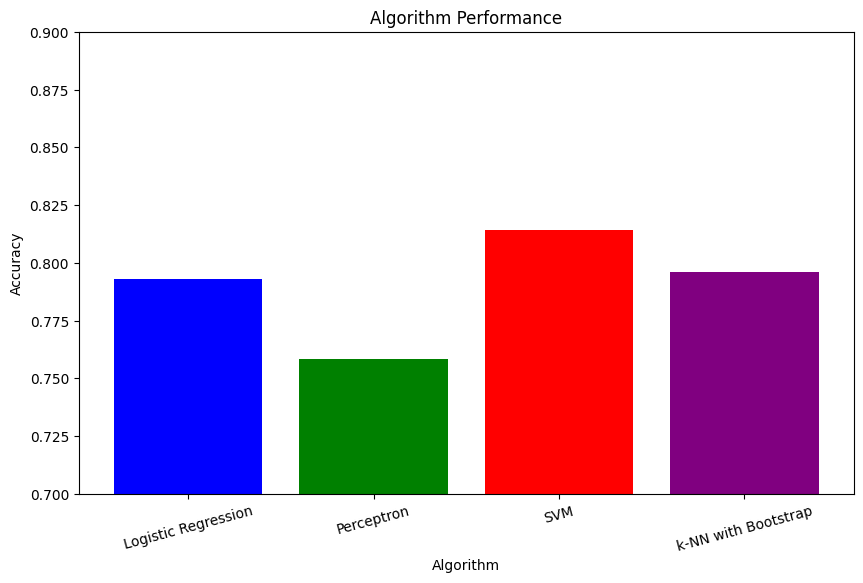

In [51]:
import matplotlib.pyplot as plt
accuracies = []
accuracies.append(accuracy_lr)
accuracies.append(accuracy_perceptron)
accuracies.append(accuracy_svm)
accuracies.append(mean_knn_accuracy)
algorithms = ['Logistic Regression', 'Perceptron', 'SVM', 'k-NN with Bootstrap']
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Algorithm Performance')
plt.ylim(0.7, 0.9)
plt.xticks(rotation=15)
plt.show()
